# How to do HW 4 the right way

## Question 8.2

All about basic matrix principles and algebra. Multiple choice and fill in the blank

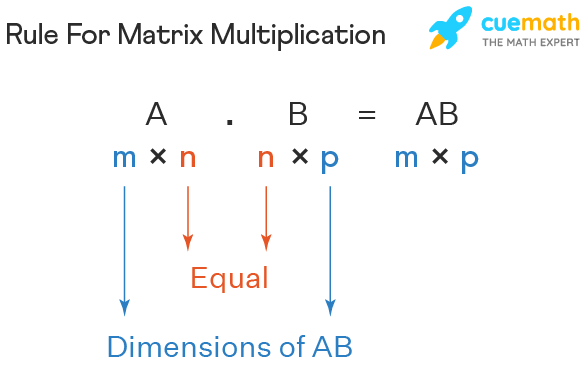

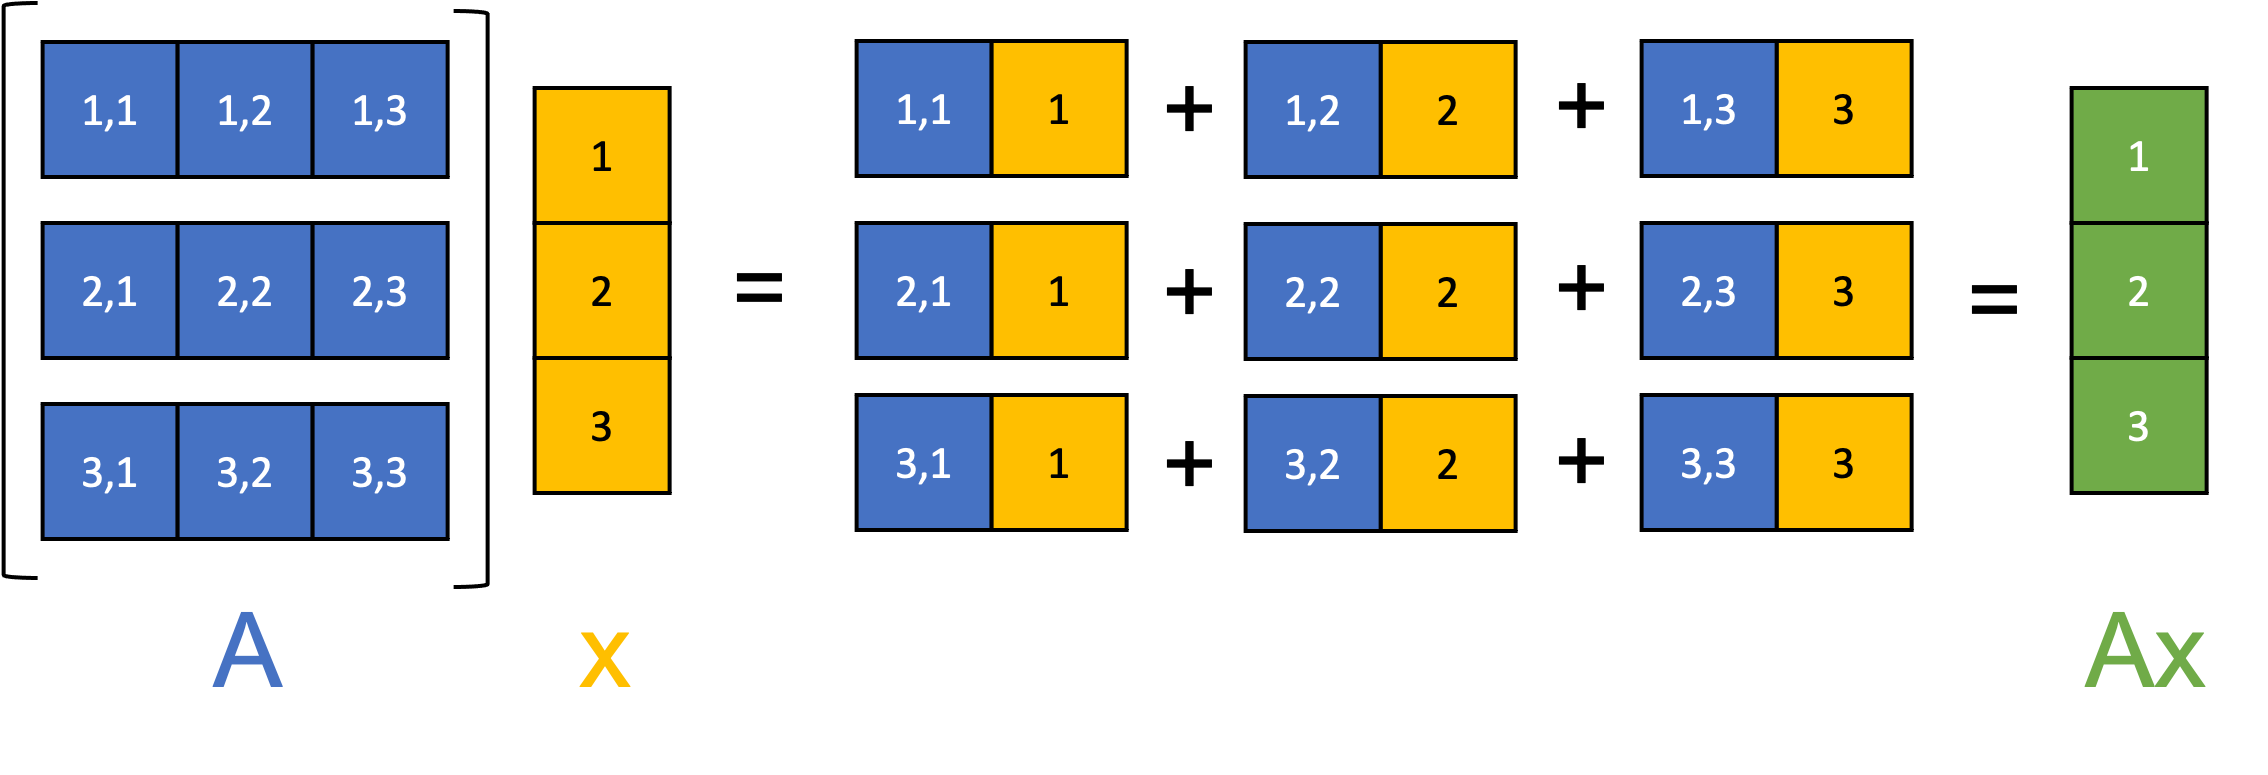

### Square Matrix:

The coefficient matrix A must be square, meaning it has the same number of rows and columns (i.e., an n×n matrix).

### Full-Rank Matrix:

The matrix A must also be full-rank, meaning its rows (or columns) must be linearly independent. This ensures that there is a unique solution to the system of equations.

In [1]:
!pip install numpy matplotlib nbconvert


[notice] A new release of pip is available: 23.2 -> 24.2
[notice] To update, run: C:\Users\hunt3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(A + B)
print(A - B)
print(A * B)
print(A / B)

## Problem 8.3: Solve the following system of equations

We are given the following system of equations:

\begin{aligned}
50 &= 5x_1 - 7x_2, \\
4x_1 + 7x_3 + 30 &= 0, \\
x_1 - 7x_3 &= 40 - 3x_2 + 5x_1.
\end{aligned}

### What are we trying to do?

We want to solve a system of linear equations that can be written in matrix form as:
$$ A⋅X=B $$
 

Where:

- A is the coefficient matrix (a matrix of numbers that multiplies the variables).
- X is the unknowns vector (the variables we're solving for).
- B is the constant vector (the known values or results from the equations).

### What does numpy.linalg.solve do?

`numpy.linalg.solve(a, b)` is a Python function that finds the exact solution X for the system of equations. It computes the values for the unknowns that satisfy the equation $A⋅X=B$.
What are the inputs?

- `a`: This is the coefficient matrix A. It should be square, meaning it has the same number of rows and columns.
- `b`: This is the constant vector B, which can be either a one-dimensional array (if you have one equation) or a two-dimensional array (if you have multiple sets of equations).

### What does it return?

The function returns:

- `x`: This is the solution vector XX. It gives you the values of the unknowns that satisfy the system of equations.

The shape of the solution depends on the shape of the input b:

- If `b` is a 1D array (for one equation), the solution will also be 1D.
- If `b` is a 2D array (for multiple equations), the solution will also be 2D.

#### Quick Example 
**1D Example: Solving a Simple Circuit**
Imagine you have a simple circuit with two resistors and two currents, and you are solving for the unknown currents I1​ and I2​ using Kirchhoff’s Current Law (KCL) and Kirchhoff’s Voltage Law (KVL).
    
\begin{aligned}
3I_1 + 2I_2 &= 12 \\
5I_1 - I_2 &= 7
\end{aligned}
$$
A = \begin{pmatrix}
3 & 2 \\
5 & -1
\end{pmatrix}
, \quad X = \begin{pmatrix}
I_1 \\
I_2
\end{pmatrix}
, \quad B = \begin{pmatrix}
12 \\
7
\end{pmatrix}
$$

Here, the constant vector B is 1D because it represents a single set of outcomes or values (just one circuit scenario). Solving this gives you one solution for $I_1$​ and $I_2$​, the currents.

**2D Example: Multiple Circuit Configurations**

Imagine you are solving for the unknown currents $I_1$​ and $I_2$​ in two different circuit scenarios using Kirchhoff’s Current Law (KCL) and Kirchhoff’s Voltage Law (KVL). Each scenario has a different set of voltage sources or resistances, leading to two different sets of outcomes.
$$
\text{For Scenario 1:}
\begin{aligned}
3I_1 + 2I_2 &= 12 \\
5I_1 - I_2 &= 7
\end{aligned}
$$
$$
\text{For Scenario 2:}
\begin{aligned}
3I_1 + 2I_2 &= 10 \\
5I_1 - I_2 &= 8
\end{aligned}
$$
$$
\text{Matrix form: }
A = \begin{pmatrix}
3 & 2 \\
5 & -1
\end{pmatrix}
, \quad X = \begin{pmatrix}
I_1 \\
I_2
\end{pmatrix}
, \quad B = \begin{pmatrix}
12 & 10 \\
7 & 8
\end{pmatrix}
$$

Each column of the matrix B represents a different set of constant values (different circuit configurations), and you would solve for $I_1$​ and $I_2$​ in both scenarios.

### What happens if something goes wrong?

If the matrix `a` is singular (meaning it can't be inverted because some rows or columns are linearly dependent) or if it is not square (doesn’t have the same number of rows and columns), the function will raise an error.



### Why does `numpy.linalg.solve` give an error when A is not full-rank?

- **Linearly dependent rows or columns**:
    
    If some rows or columns in A are linearly dependent, it means those rows/columns don’t provide new information. In other words, one or more equations in the system are redundant (a combination of other equations).

- **Unique solution requirement**:
    
    numpy.linalg.solve requires a unique solution to the system $A⋅X=B$. If A is not full-rank, the system could have infinitely many solutions or no solution at all. A unique solution only exists when A is invertible, which requires A to be square and full-rank.
- **Error when not full-rank**:
    
    If numpy.linalg.solve detects that AA is not full-rank (through an internal algorithm like LU decomposition), it throws an error because it can't find a unique solution.

### Why do we need these conditions?

- **Square matrix**:

    This ensures that you have as many equations as you have unknowns. Without this, you wouldn't be able to solve for all the unknowns, or you'd have too many solutions (overdetermined or underdetermined system).

- **Full-rank matrix**:

    This guarantees that the matrix is invertible. If the matrix is not full-rank, it either has no solution or has infinitely many solutions, and numpy.linalg.solve won't be able to find a unique solution.


#### Over and under determined? What??? The rabbit hole is deep


**Overdetermined Systems**

An overdetermined system occurs when there are more equations than unknowns. This situation arises when you have more constraints than variables. In electrical engineering, this often happens when measuring currents or voltages at multiple points in a circuit with redundant measurements.

Suppose you are trying to determine the voltage across a single resistor, but you have three equations for just one unknown voltage due to extra measurements or constraints:

\begin{aligned}
V_R &= 5 \quad \text{(from measurement 1)} \\
V_R &= 5.1 \quad \text{(from measurement 2)} \\
V_R &= 4.9 \quad \text{(from measurement 3)}
\end{aligned}

This is an overdetermined system because you have three equations but only one unknown. There's no unique solution that satisfies all equations exactly, but we can use a least-squares solution to find the voltage VRVR​ that best fits all the data (in this case, probably close to 5V).

$$
A = \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}
, \quad X = V_R
, \quad B = \begin{pmatrix}
5 \\
5.1 \\
4.9
\end{pmatrix}
$$

Since there are more equations than unknowns, you would use `numpy.linalg.lstsq()` to find the best approximate solution.

**Underdetermined Systems**

An underdetermined system happens when there are fewer equations than unknowns. This means there aren’t enough constraints to determine a unique solution, and typically, the system has infinitely many solutions.
Example:

Imagine you have a circuit with two resistors, but only one equation describing the current. You are asked to find the currents $I_1$​ and $I_2$​, but you only have one equation, like:
$$
I_1 + I_2 = 3
$$

$$
A = \begin{pmatrix}
1 & 1
\end{pmatrix}
, \quad X = \begin{pmatrix}
I_1 \\
I_2
\end{pmatrix}
, \quad B = 3
$$

To handle this, you would need additional information (like another equation) to solve for $I_1$​ and $I_2$​, or you could use least squares or optimization techniques to find a solution based on other constraints.

### Solution to Q8.3

\begin{aligned}
50 &= 5x_1 - 7x_2, \\
4x_1 + 7x_3 + 30 &= 0, \\
x_1 - 7x_3 &= 40 - 3x_2 + 5x_1.
\end{aligned}

### Step 1: Rearranging the equations

First, let's rewrite the equations into a more standard form:

\begin{aligned}
5x_1 - 7x_2 &= 50, \\
4x_1 + 7x_3 &= -30, \\
5x_1 + 3x_2 - 8x_3 &= 40.
\end{aligned}


### Step 2: Matrix Form Representation

We can represent this system in matrix form as AX=B, where:

- A is the coefficient matrix
- X is the vector of unknowns
- B is the constants vector

The matrix form is:

$$
\begin{pmatrix}
5 & -7 & 0 \\
4 & 0 & 7 \\
5 & 3 & -8
\end{pmatrix}

\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}

=
\begin{pmatrix}
50 \\
-30 \\
40
\end{pmatrix}
$$

### Step 3: Solve the System of Equations in Python

We can solve this system using NumPy's linalg.solve() function:

In [20]:
# first thing to do???

# coefficient matrix A

# constants matrix B

# Solve the system

In [ ]:
import numpy as np

# Coefficient matrix A
A = np.array([[5, -7, 0],
              [4, 0, 7],
              [5, 3, -8]])

# Constants vector B
B = np.array([50, -30, 40])

# Solve the system
X = np.linalg.solve(A, B)

print("Solution for the unknowns (x1, x2, x3):")
print(X)


### Step 4: Compute the Transpose of Matrix $A$

To compute the transpose of the coefficient matrix $A$, we use NumPy's `transpose()` function:

In [21]:
# Transpose of matrix A
A_transpose = np.transpose(A)

print("Transpose of the coefficient matrix A:")
print(A_transpose)


Transpose of the coefficient matrix A:
[[10 -3  1]
 [ 2 -5  1]
 [-1  2  6]]


### Step 5: Compute the Inverse of Matrix A

To compute the inverse of matrix $A$, we use NumPy's `inv()` function:

In [22]:
# Inverse of matrix A
A_inverse = np.linalg.inv(A)

print("Inverse of the coefficient matrix A:")
print(A_inverse)


Inverse of the coefficient matrix A:
[[ 0.11347518  0.04609929  0.0035461 ]
 [-0.07092199 -0.21631206  0.06028369]
 [-0.0070922   0.02836879  0.15602837]]


## Question 9.6

Given the equations:

\begin{aligned}
10x_1 + 2x_2 - x_3 &= 27 \\
-3x_1 - 5x_2 + 2x_3 &= -61.5 \\
x_1 + x_2 + 6x_3 &= -21.5
\end{aligned}

(a) Solve by naive Gauss elimnination. Show all steps of the computation

(b) Substitute your results into the original equations to check your answer

#### 1. Augmentation of the Matrix

The first step in Gaussian elimination is to write the system of linear equations as an augmented matrix.

**Why Augmentation?**

- In a system of equations, we have both the coefficients of the variables and the constants on the right-hand side of the equations.
- The augmented matrix combines the coefficient matrix $A$ and the constants vector $B$ into one matrix, making the operations simpler. You perform operations on both the coefficients and the constants simultaneously.

#### 2. Row Operations: Forward Elimination to Form an Upper Triangular Matrix

The goal of Gaussian elimination is to transform the augmented matrix into an upper triangular matrix using elementary row operations. This simplifies solving the system through back-substitution.
Why Upper Triangular Form?

- In an upper triangular matrix, all the elements below the diagonal are zeros, which makes solving for variables easier (you can solve from the bottom up).

#### 3. Back-Substitution: Solving from the Bottom Up

Once we have the matrix in upper triangular form, we can solve for the unknowns starting from the bottom row and work upwards. This method is called back-substitution.

**Why Back-Substitution?**

In the upper triangular form, each equation only involves one unknown as you move up the rows. This allows you to solve for the unknowns in reverse order, starting with the last variable and working your way up.

#### Summary

- **Augmentation**: Combines the coefficient matrix and constants into one matrix for easier manipulation.
- **Row Operations**: These are used to create zeros below the diagonal, simplifying the system to upper triangular form.
- **Back-Substitution**: Once the matrix is in upper triangular form, we can easily solve for each unknown starting from the bottom row and working our way up.

In [11]:
import numpy as np

# Coefficient matrix A
A = np.array([[10, 2, -1],
              [-3, -5, 2],
              [1, 1, 6]])

# Constants vector B
B = np.array([27, -61.5, -21.5])

# Augmented matrix [A|B]
augmented_matrix = np.column_stack((A, B))
print("Augmented Matrix [A|B]:")
print(augmented_matrix)


Augmented Matrix [A|B]:
[[ 10.    2.   -1.   27. ]
 [ -3.   -5.    2.  -61.5]
 [  1.    1.    6.  -21.5]]


In [12]:
# Row 2: R2 = R2 + (3/10) * R1
augmented_matrix[1] = augmented_matrix[1] + (3/10) * augmented_matrix[0]
print("\nAfter making R2[0] zero:")
print(augmented_matrix)

# Row 3: R3 = R3 - (1/10) * R1
augmented_matrix[2] = augmented_matrix[2] - (1/10) * augmented_matrix[0]
print("\nAfter making R3[0] zero:")
print(augmented_matrix)



After making R2[0] zero:
[[ 10.    2.   -1.   27. ]
 [  0.   -4.4   1.7 -53.4]
 [  1.    1.    6.  -21.5]]

After making R3[0] zero:
[[ 10.    2.   -1.   27. ]
 [  0.   -4.4   1.7 -53.4]
 [  0.    0.8   6.1 -24.2]]


In [13]:
# Row 3: R3 = R3 - (0.8 / -4.4) * R2
augmented_matrix[2] = augmented_matrix[2] - (0.8 / augmented_matrix[1, 1]) * augmented_matrix[1]
print("\nAfter making R3[1] zero:")
print(augmented_matrix)



After making R3[1] zero:
[[ 10.           2.          -1.          27.        ]
 [  0.          -4.4          1.7        -53.4       ]
 [  0.           0.           6.40909091 -33.90909091]]


In [14]:
# Solve for x3
x3 = augmented_matrix[2, -1] / augmented_matrix[2, 2]
print(f"\nSolution for x3: {x3}")



Solution for x3: -5.290780141843972


In [15]:
# Solve for x2 using the second row
x2 = (augmented_matrix[1, -1] - augmented_matrix[1, 2] * x3) / augmented_matrix[1, 1]
print(f"Solution for x2: {x2}")


Solution for x2: 10.092198581560282


In [17]:
# Solve for x1 using the first row
x1 = (augmented_matrix[0, -1] - augmented_matrix[0, 1] * x2 - augmented_matrix[0, 2] * x3) / augmented_matrix[0, 0]
print(f"Solution for x1: {x1}")


Solution for x1: 0.15248226950354632


In [18]:
# Try using numpy.linalg.solve
X = np.linalg.solve(A, B)

print("\nSolution using numpy.linalg.solve:")
print(X)



Solution using numpy.linalg.solve:
[ 0.15248227 10.09219858 -5.29078014]


## LU Decomposition Example in Circuit Analysis

In this example, we are using LU decomposition to solve a system of equations derived from Kirchhoff's Current Law (KCL) in a simple circuit with three nodes.

The system of equations is:


\begin{aligned}
10V_1 - 2V_2 - 1V_3 &= 12 \\
-3V_1 + 8V_2 - 2V_3 &= 14 \\
1V_1 - 4V_2 + 7V_3 &= 5
\end{aligned}


We will use LU decomposition to solve this system and find the node voltages \( V_1, V_2, V_3 \).

LU decomposition splits the coefficient matrix \( A \) into two matrices:
- \( L \): A lower triangular matrix.
- \( U \): An upper triangular matrix.

Once \( A \) is decomposed into \( LU \), we can solve the system in two steps:
1. **Forward substitution** to solve \( LY = B \).
2. **Back substitution** to solve \( UX = Y \), where \( X \) contains the node voltages.


\begin{aligned}
10V_1 - 2V_2 - 1V_3 &= 12 \\
-3V_1 + 8V_2 - 2V_3 &= 14 \\
1V_1 - 4V_2 + 7V_3 &= 5
\end{aligned}

$$
A = LU
\quad \text{where} \quad
A =
\begin{pmatrix}
10 & -2 & -1 \\
-3 & 8 & -2 \\
1 & -4 & 7
\end{pmatrix},
B =
\begin{pmatrix}
12 \\
14 \\
5
\end{pmatrix}
$$

In [ ]:
import numpy as np

# Step 1: Define the coefficient matrix A and constants vector B
A = np.array([[10, -2, -1],
              [-3, 8, -2],
              [1, -4, 7]], dtype=float)

B = np.array([12, 14, 5], dtype=float)

**Initialization**: We start by initializing the L (lower triangular) and U (upper triangular) matrices as zero matrices.

In [ ]:
# Get the number of rows
n = A.shape[0]

# Step 2: Initialize L and U matrices
L = np.zeros((n, n))
U = np.zeros((n, n))

**LU Decomposition**:

- For each row, we compute the elements of the upper triangular matrix UU by subtracting the sum of the products of L[i,j]L[i,j] and U[j,k]U[j,k].
- Similarly, we compute the elements of the lower triangular matrix LL, ensuring that the diagonal elements are all 1.

In [ ]:
# LU Decomposition algorithm
for i in range(n):
    # Upper triangular matrix U
    for k in range(i, n):
        U[i, k] = A[i, k] - sum(L[i, j] * U[j, k] for j in range(i))
    
    # Lower triangular matrix L
    for k in range(i, n):
        if i == k:
            L[i, i] = 1  # Diagonal as 1
        else:
            L[k, i] = (A[k, i] - sum(L[k, j] * U[j, i] for j in range(i))) / U[i, i]

In [ ]:
# Display the L and U matrices
print("Lower triangular matrix L:")
print(L)
print("\nUpper triangular matrix U:")
print(U)

**Forward Substitution**: Once we have $L$, we solve $LY=B$ using forward substitution, working from the top row down.

In [ ]:
# Step 3: Solve LY = B using forward substitution
Y = np.zeros(n)
for i in range(n):
    Y[i] = (B[i] - sum(L[i, j] * Y[j] for j in range(i)))

**Back Substitution**: Uses the known values of $Y$ to solve for the unknown voltages $V1_1$​, $V_2$​, and $V_3$​, starting from the bottom and working upwards.

In [ ]:
# Step 4: Solve UX = Y using back substitution
X = np.zeros(n)
for i in range(n-1, -1, -1):
    X[i] = (Y[i] - sum(U[i, j] * X[j] for j in range(i+1, n))) / U[i, i]

In [ ]:
# Display the final solution
V1, V2, V3 = X
print(f"\nThe node voltages are: V1 = {V1}, V2 = {V2}, V3 = {V3}")

In [1]:
import numpy as np
from scipy.linalg import lu

# Coefficient matrix A
A = np.array([[10, -2, -1],
              [-3, 8, -2],
              [1, -4, 7]])

# Constant matrix B (representing the voltage sources or currents)
B = np.array([12, 14, 5])

# Perform LU decomposition
P, L, U = lu(A)

# Show the matrices
print("Lower triangular matrix L:")
print(L)
print("\nUpper triangular matrix U:")
print(U)

# Solve LY = B using forward substitution
Y = np.linalg.solve(L, B)
print("\nSolution to LY = B (Y):")
print(Y)

# Solve UX = Y using back substitution
X = np.linalg.solve(U, Y)
print("\nSolution to UX = Y (Node Voltages, X):")
print(X)

# Display the final result
V1, V2, V3 = X
print(f"\nThe node voltages are: V1 = {V1}, V2 = {V2}, V3 = {V3}")


Lower triangular matrix L:
[[ 1.          0.          0.        ]
 [-0.3         1.          0.        ]
 [ 0.1        -0.51351351  1.        ]]

Upper triangular matrix U:
[[10.         -2.         -1.        ]
 [ 0.          7.4        -2.3       ]
 [ 0.          0.          5.91891892]]

Solution to LY = B (Y):
[12.         17.6        12.83783784]

Solution to UX = Y (Node Voltages, X):
[2.02739726 3.05251142 2.16894977]

The node voltages are: V1 = 2.0273972602739727, V2 = 3.0525114155251143, V3 = 2.168949771689497
